# nuScenes dataset onboarding

This notebook illustrates methods to interact with nuScenes dataset especially its Lidar point cloud data.

### Initialization and exploration

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

VERSION = 'v1.0-mini'
DATAROOT = '/Users/kaitoY/data/nuScenes/mini'

nusc = NuScenes(version=VERSION, dataroot=DATAROOT, verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.461 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [3]:
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

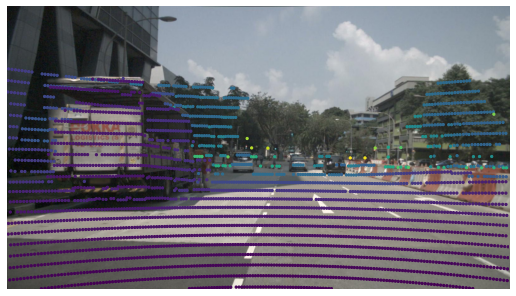

In [4]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

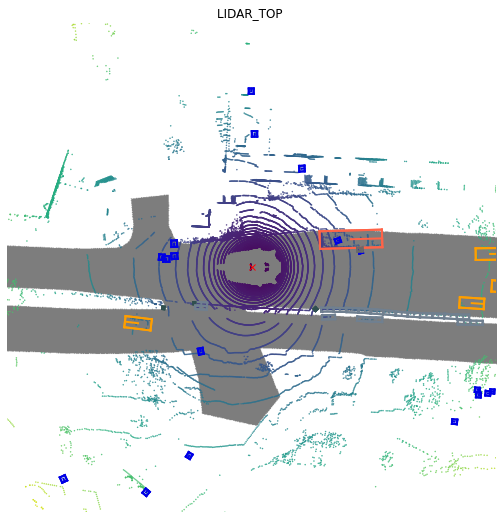

In [5]:
nusc.render_sample_data(my_sample['data']['LIDAR_TOP'], nsweeps=1, underlay_map=True)

### Have a look at raw Lidar data

In [16]:
import os
from nuscenes.utils.data_classes import LidarPointCloud

sample_data_token = my_sample['data']['LIDAR_TOP']
my_sample_data = nusc.get('sample_data', sample_data_token)
    
pc = LidarPointCloud.from_file(os.path.join(DATAROOT, my_sample_data['filename']))
print(pc.points.shape)
pc.points

(4, 34688)


array([[-3.1243734e+00, -3.2906363e+00, -3.4704101e+00, ...,
        -1.4129141e+01, -1.4120683e+01, -1.4113669e+01],
       [-4.3415368e-01, -4.3220678e-01, -4.3068862e-01, ...,
         4.9357712e-03,  9.8654358e-03,  1.4782516e-02],
       [-1.8671920e+00, -1.8631892e+00, -1.8595628e+00, ...,
         1.9857219e+00,  2.3199446e+00,  2.6591547e+00],
       [ 4.0000000e+00,  1.0000000e+00,  2.0000000e+00, ...,
         8.0000000e+01,  7.5000000e+01,  4.0000000e+01]], dtype=float32)